In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Condition monitoring/RUL Regression/Train_1_RUL.csv')

In [ ]:
df.rename(columns = {'Cycle':'cycles', 'OpSet1':'setting_1', 'OpSet2':'setting_2', 'OpSet3':'setting_3', 'SensorMeasure1':'T2',
                     'SensorMeasure2':'T24', 'SensorMeasure3':'T30', 'SensorMeasure4':'T50', 'SensorMeasure5':'P2', 'SensorMeasure6':'P15',
                     'SensorMeasure7':'P30', 'SensorMeasure8':'Nf', 'SensorMeasure9':'Nc', 'SensorMeasure10':'epr', 'SensorMeasure11':'Ps30',
                     'SensorMeasure12':'phi', 'SensorMeasure13':'NRf', 'SensorMeasure14':'NRc', 'SensorMeasure15':'BPR', 'SensorMeasure16':'farB',
                     'SensorMeasure17':'htBleed', 'SensorMeasure18':'Nf_dmd', 'SensorMeasure19':'PCNfR_dmd', 'SensorMeasure20':'W31', 'SensorMeasure21':'W32'}, inplace = True)

In [ ]:
df.head()

,ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [ ]:
#generate descriptive statistics
df.describe()

,ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


In [ ]:
df.nunique(axis=0)  #Count distinct observations over requested axis.

ID            100
cycles        362
setting_1     158
setting_2      13
setting_3       1
T2              1
T24           310
T30          3012
T50          4051
P2              1
P15             2
P30           513
Nf             53
Nc           6403
epr             1
Ps30          159
phi           427
NRf            56
NRc          6078
BPR          1918
farB            1
htBleed        13
Nf_dmd          1
PCNfR_dmd       1
W31           120
W32          4745
RUL           362
dtype: int64

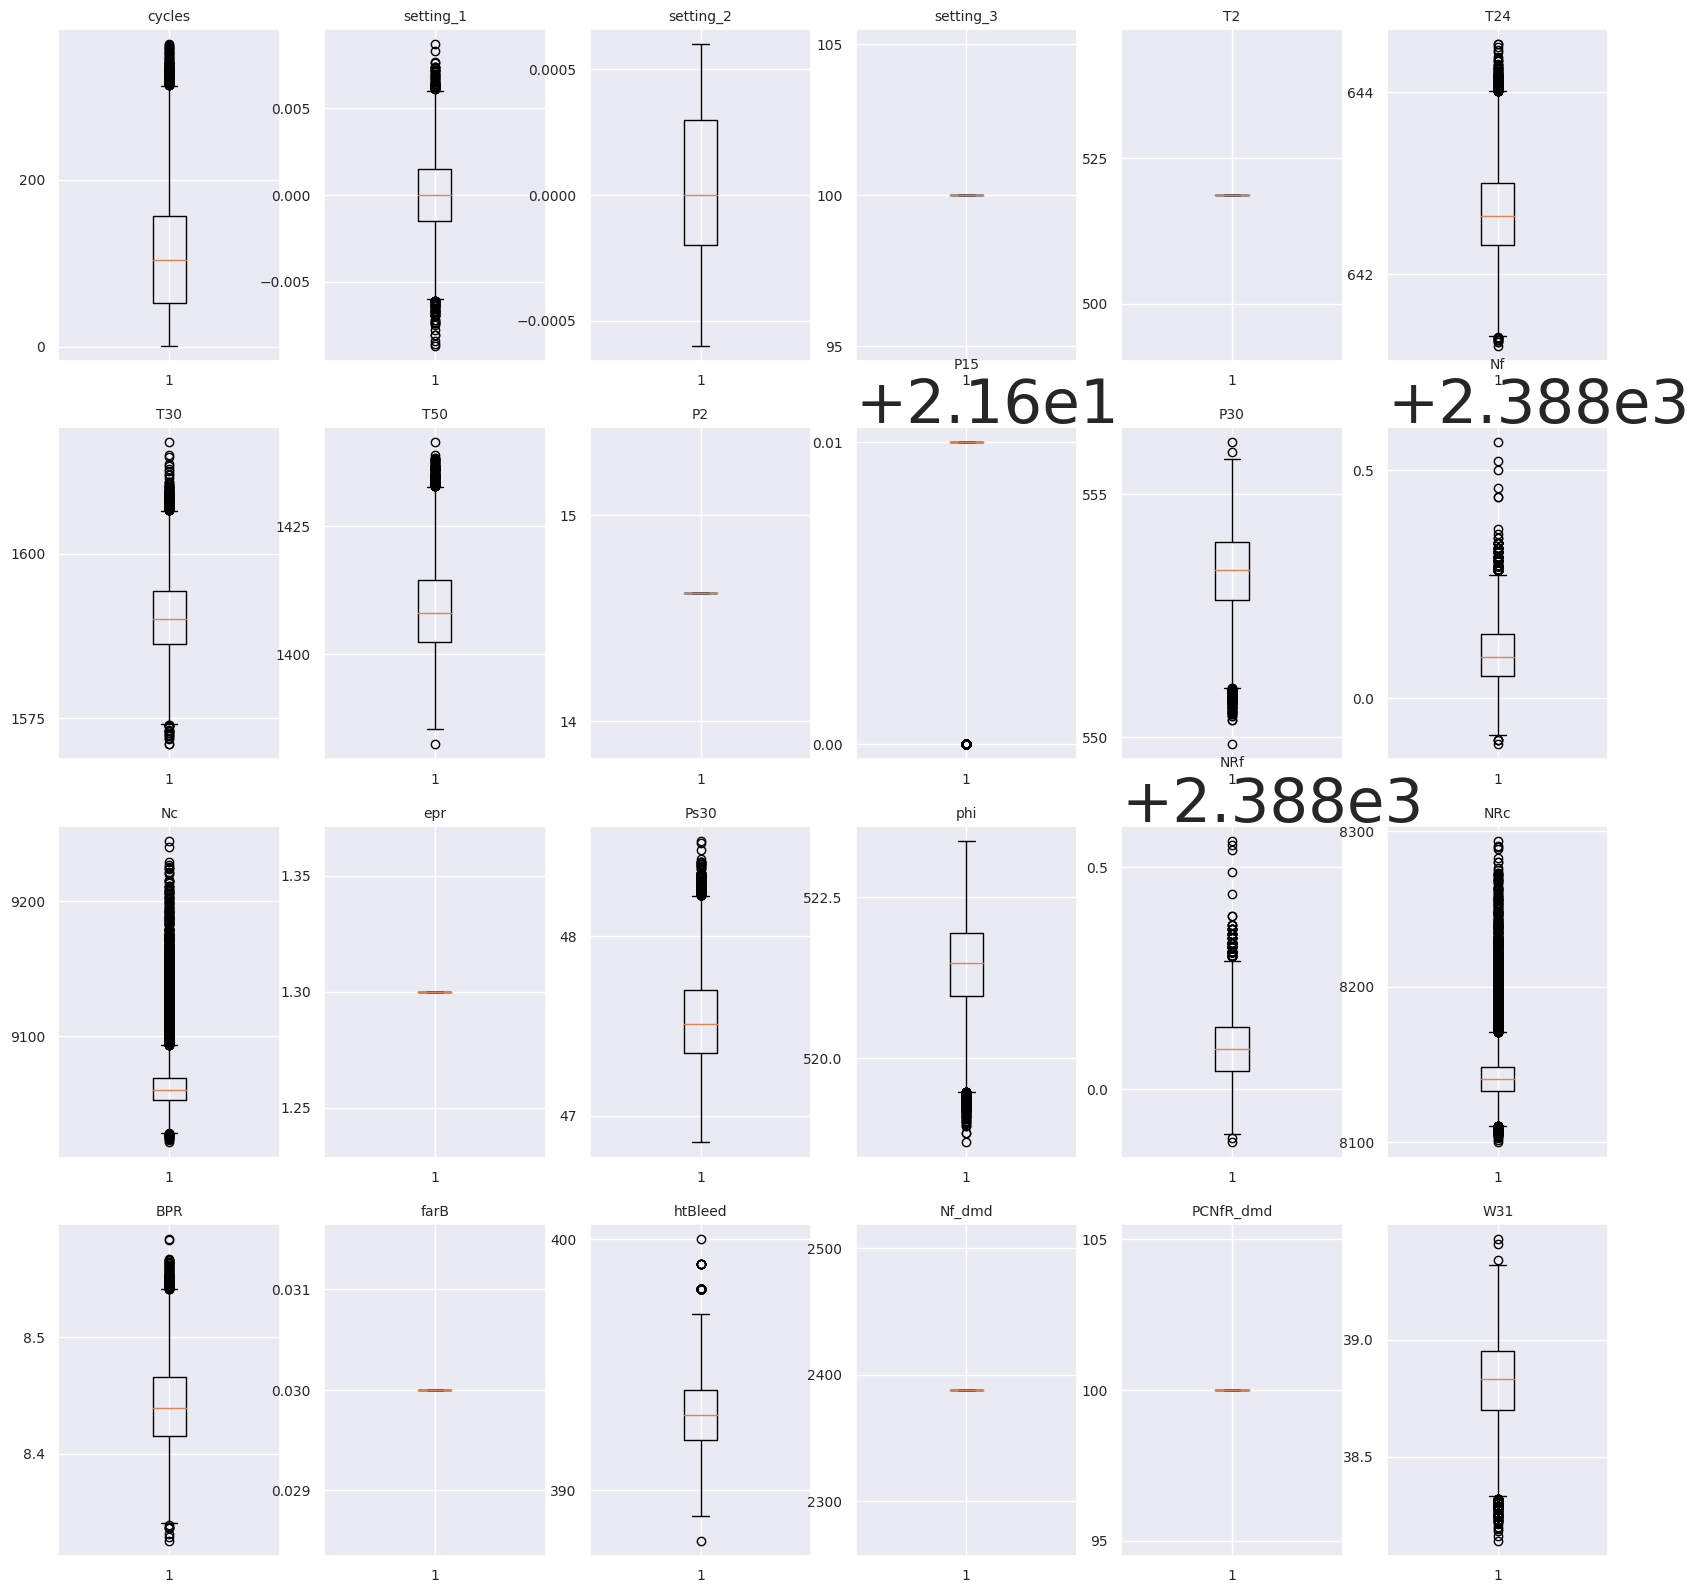

In [ ]:
# Box plot
plt.figure(figsize = (20, 25))
for i in np.arange(1, 25):
    temp = df.iloc[:, i]
    plt.subplot(5,6, i)
    plt.boxplot(temp)
    plt.title(df.columns[i], fontsize= 10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
plt.show()

In [ ]:
# dropping those columns which are having constant values
df.drop(columns=['setting_3', 'T2', 'P2', 'epr', 'farB', 'Nf_dmd', 'PCNfR_dmd'], inplace=True)
df.head()

,ID,cycles,setting_1,setting_2,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


In [ ]:
df.shape

(20631, 20)

In [ ]:
# dropping the columns Opset1 and Opset2 beacuse they have negligible coorealtion
df.drop(columns=['setting_1','setting_2'], inplace=True)

In [ ]:
#df.to_csv('Processed_Train_004.csv', index=None)

In [ ]:
# prompt: proceed the further code

# Checking for missing values
df.isnull().sum()
# Correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()
# Splitting the data into training and testing sets
X = df.drop('RUL', axis=1)
y = df['RUL']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
